In [534]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [535]:
df1 = pd.read_csv("winequality-red.csv", sep=";")
df2 = pd.read_csv("winequality-white.csv", sep=";")
df = pd.concat([df1, df2], axis=0, ignore_index=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [536]:
df.shape

(6497, 12)

In [537]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [538]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [539]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [540]:
df.duplicated().sum()

np.int64(1179)

In [541]:
df.drop_duplicates(inplace=True)

In [542]:
df.duplicated().sum()

np.int64(0)

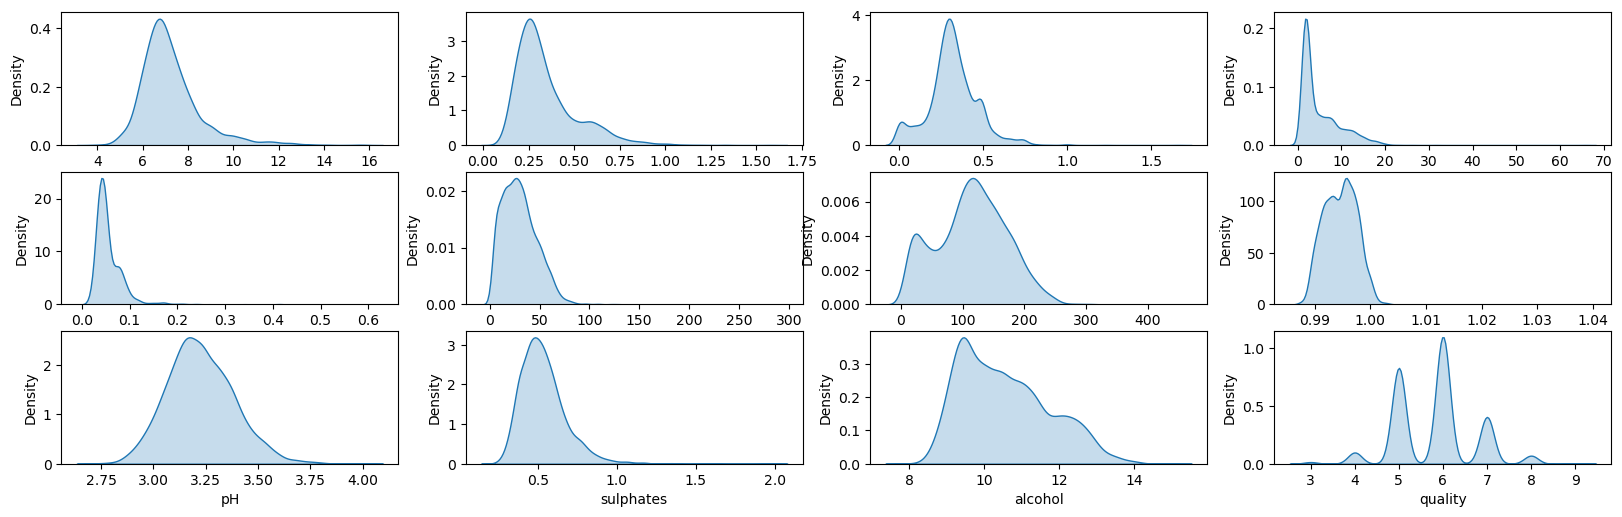

fixed acidity = 1.6501
volatile acidity = 1.5041
citric acid = 0.4838
residual sugar = 1.7060
chlorides = 5.3391
free sulfur dioxide = 1.3638
total sulfur dioxide = 0.0637
density = 0.6660
pH = 0.3904
sulphates = 1.8091
alcohol = 0.5459
quality = 0.1475


In [543]:
plt.figure(figsize=(20, 10))
for i,col in enumerate(df.columns,1):
    plt.subplot(5,4,i)
    sns.kdeplot(df[col],fill=True)
plt.show()
for col in df.columns:
    print(f"{col} = {df[col].skew():.4f}")


In [544]:
df["fixed acidity"] = np.log1p(df["fixed acidity"])
df["volatile acidity"] = np.log1p(df["volatile acidity"])
df["residual sugar"] = np.log1p(df["residual sugar"])
df["chlorides"] = np.cbrt(df["chlorides"])
df["free sulfur dioxide"] = np.log1p(df["free sulfur dioxide"])
df["sulphates"] = np.log1p(df["sulphates"])
print("Chlorides skewness after log transform:", df["chlorides"].skew())

Chlorides skewness after log transform: 1.8320516110139429


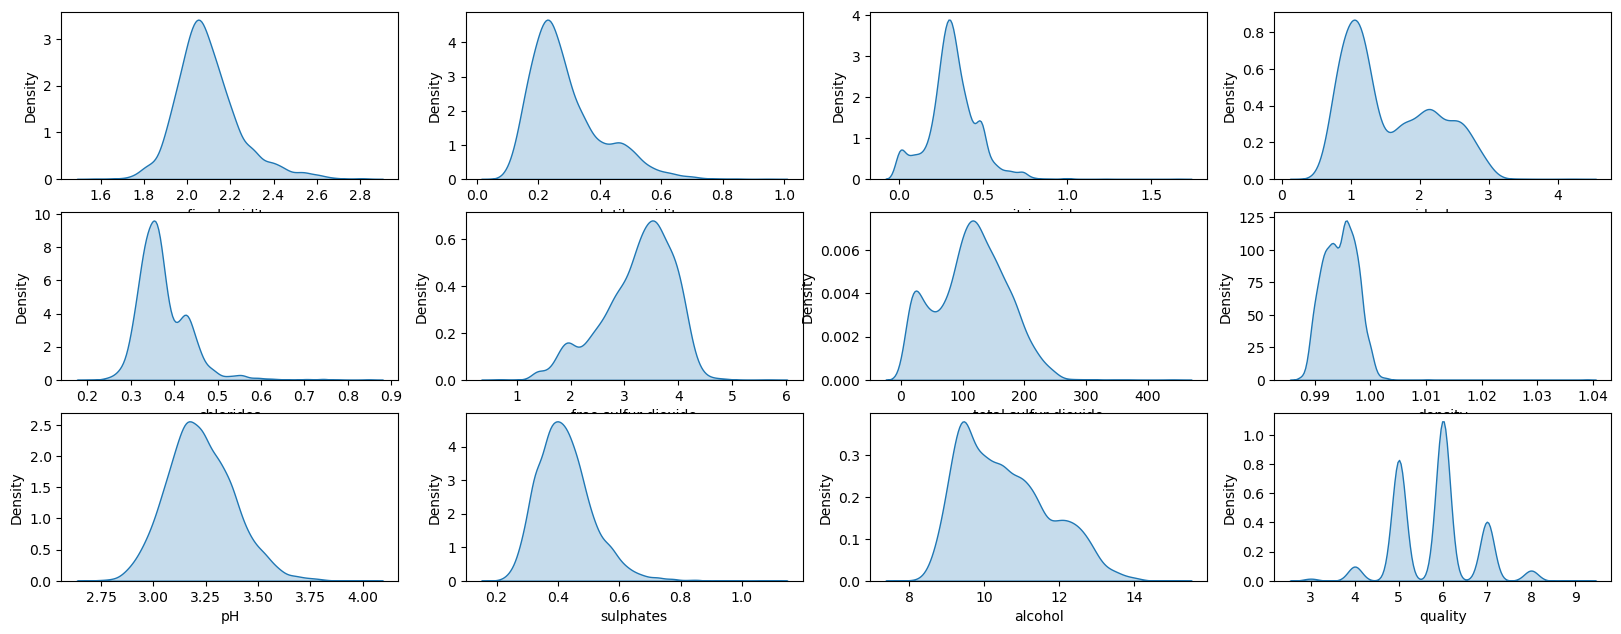

fixed acidity = 0.9281
volatile acidity = 1.1293
citric acid = 0.4838
residual sugar = 0.5129
chlorides = 1.8321
free sulfur dioxide = -0.6784
total sulfur dioxide = 0.0637
density = 0.6660
pH = 0.3904
sulphates = 1.1046
alcohol = 0.5459
quality = 0.1475


In [545]:
plt.figure(figsize=(20, 10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,4,i)
    sns.kdeplot(df[col],fill=True)
plt.show()
for col in df.columns:
    print(f"{col} = {df[col].skew():.4f}")


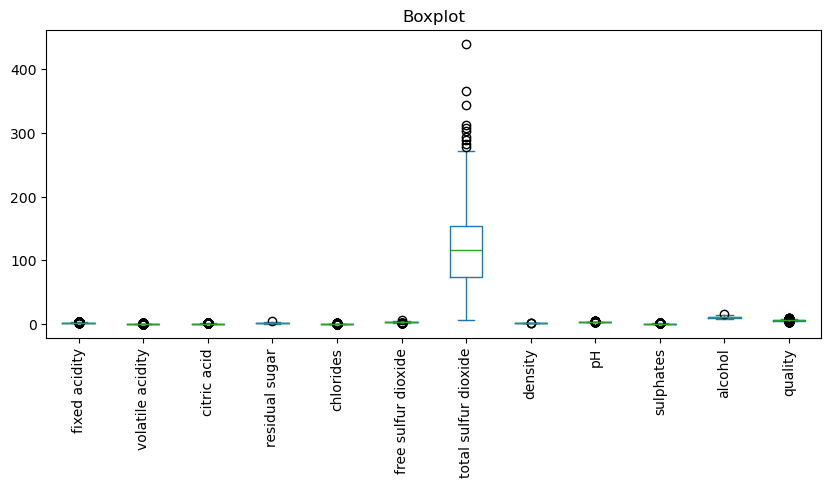

In [546]:
df.plot(kind="box", figsize=(10,4))
plt.title("Boxplot")
plt.xticks(rotation=90)
plt.show()

In [547]:
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].mask((df[col] < lower_bound) | (df[col] > upper_bound))
    df[col] = df[col].bfill()
    


In [548]:
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].mask((df[col] < lower_bound) | (df[col] > upper_bound))
    df[col] = df[col].bfill()
    


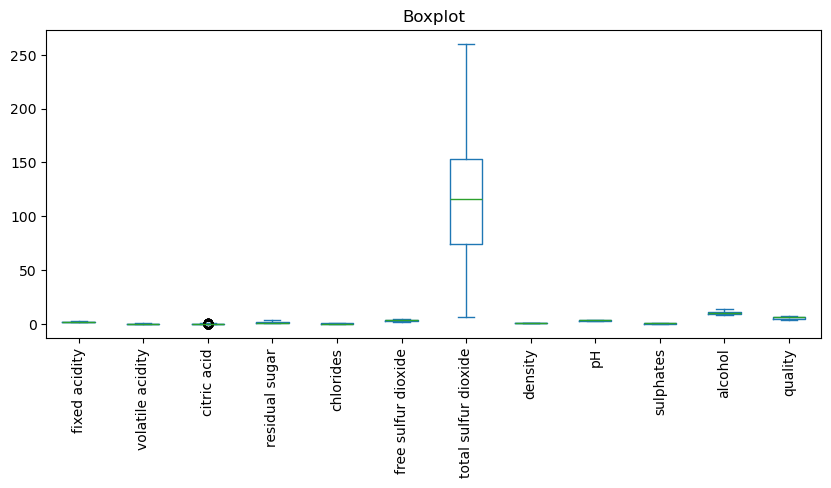

In [549]:
df.plot(kind="box", figsize=(10,4))
plt.title("Boxplot")
plt.xticks(rotation=90)
plt.show()

<Axes: >

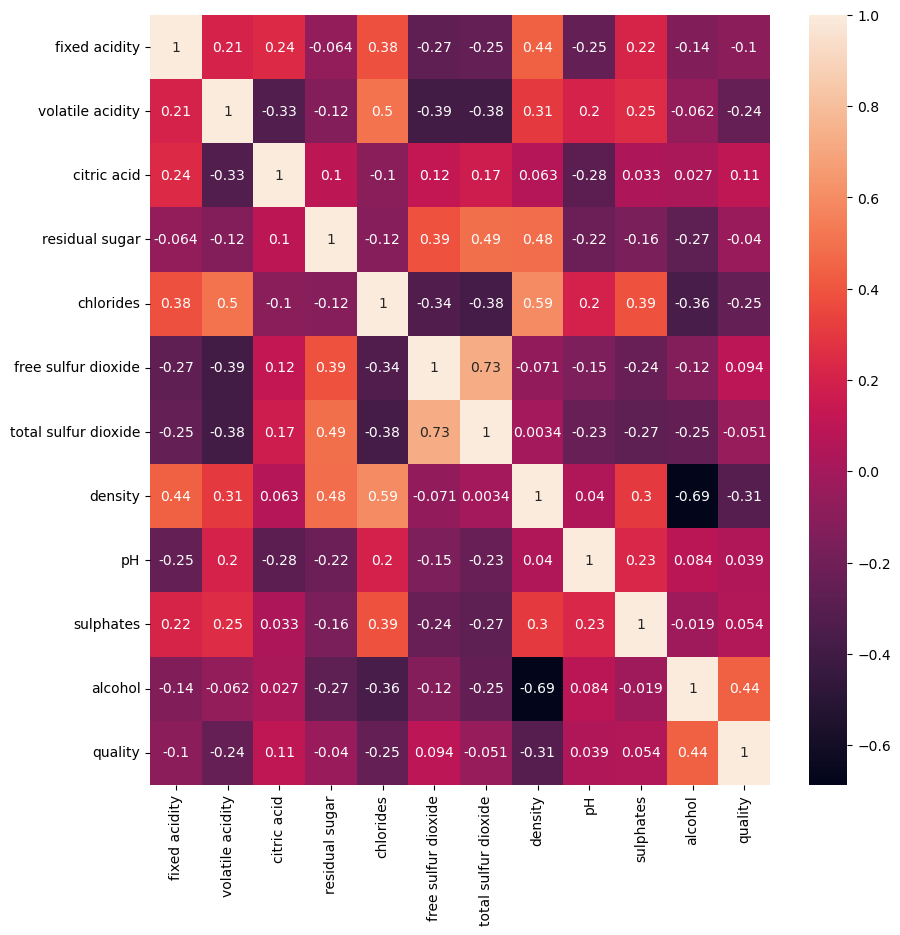

In [550]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [551]:
x=df.drop(columns="quality")
y=df["quality"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [552]:
pca = PCA()
X_pca = pca.fit_transform(x_train)

In [553]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.28978369 0.22166364 0.13336965 0.08826396 0.06406964 0.05535356
 0.04837456 0.04114183 0.03201601 0.02064761 0.00531586]


In [554]:
cum_var = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", cum_var)

Cumulative Explained Variance: [0.28978369 0.51144733 0.64481698 0.73308094 0.79715058 0.85250414
 0.9008787  0.94202052 0.97403654 0.99468414 1.        ]


In [555]:
cum_var = np.cumsum(pca.explained_variance_ratio_)

threshold = 0.90
k = np.argmax(cum_var >= threshold) + 1
print(f"Optimal number of components for {threshold*100:.0f}% variance:", k)

Optimal number of components for 90% variance: 7


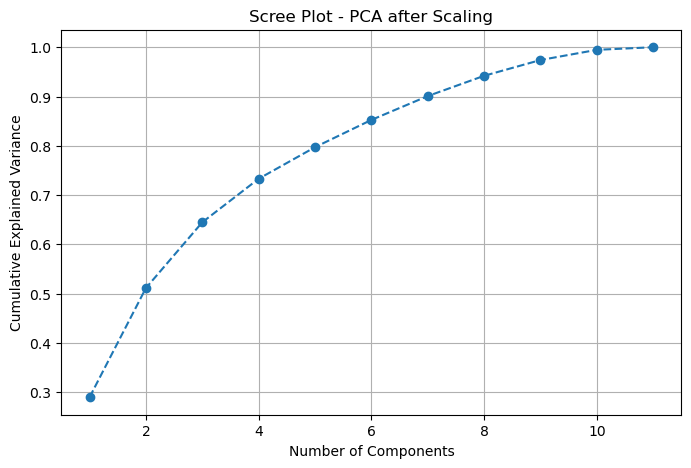

In [556]:
cum_var = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot - PCA after Scaling")
plt.grid(True)
plt.show()

In [557]:
pca=PCA(n_components=5)
xtrain_pca=pca.fit_transform(x_train)
xtest_pca=pca.transform(x_test)
print("Original Shape:",x.shape)
print("shape od dataset after PCA:",xtrain_pca.shape)

Original Shape: (5318, 11)
shape od dataset after PCA: (4254, 5)


C:\Users\ganesh\AppData\Local\Temp\ipykernel_18056\1971378067.py:2: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



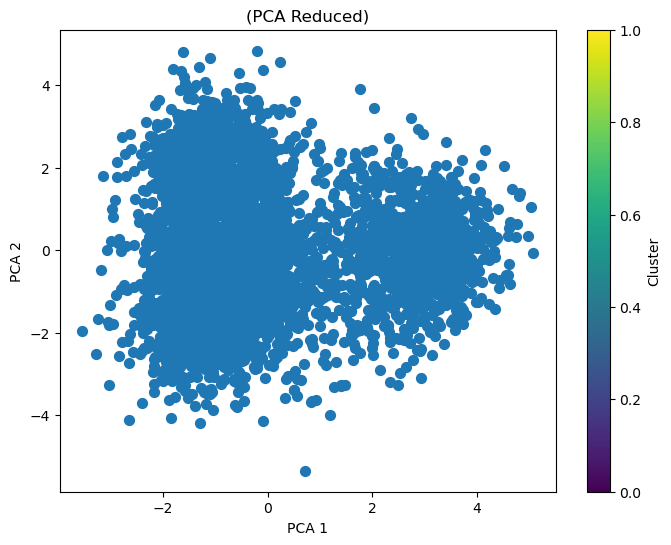

In [558]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], cmap="viridis", s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("(PCA Reduced)")
plt.colorbar(label="Cluster")
plt.show()

In [559]:
x_p=pd.DataFrame(x_pca)

In [560]:
import plotly.express as px
fig = px.scatter_3d(
    x=x_p.iloc[:, 0],  # PC1
    y=x_p.iloc[:, 1],  # PC2
    z=x_p.iloc[:, 2],  # PC3
    title="3D Cluster Plot (Interactive with Plotly)"
)
fig.show()

In [563]:
model=LinearRegression()
model.fit(xtrain_pca,y_train)
y_pred=model.predict(xtest_pca)
print("mean_squared_error:",mean_squared_error(y_test,y_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_pred))
print("root_mean_squared_error:",np.sqrt(mean_squared_error(y_test,y_pred)))

mean_squared_error: 0.4585683697741317
mean_absolute_error: 0.5418337414115675
root_mean_squared_error: 0.6771767640536197
